# Latent Semantic Analysis Wikipedia World Cup dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')
%autosave 120

Autosaving every 120 seconds


In [2]:
from gensim import corpora
from gensim.models import LsiModel
from gensim.parsing.preprocessing import preprocess_string

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [4]:
import re

HANDLE = '@\w+'
LINK = 'https?://t\.co/\w+'
SPECIAL_CHARS = '&lt;|&lt;|&amp;|#'
PARA='\n+'
def clean(text):
    #text = re.sub(HANDLE, ' ', text)
    text = re.sub(LINK, ' ', text)
    text = re.sub(SPECIAL_CHARS, ' ', text)
    text = re.sub(PARA, '\n', text)
    return text

In [5]:
import wikipedia

In [6]:
wikipedia.search('Cricket World Cup'),wikipedia.search('FIFA World Cup')

(['Cricket World Cup',
  '2019 Cricket World Cup',
  'Under-19 Cricket World Cup',
  '2023 Cricket World Cup',
  '2011 Cricket World Cup',
  '1983 Cricket World Cup',
  '2020 Under-19 Cricket World Cup',
  '2007 Cricket World Cup',
  '2015 Cricket World Cup',
  '1996 Cricket World Cup'],
 ['FIFA World Cup',
  '2018 FIFA World Cup',
  '2014 FIFA World Cup',
  '2022 FIFA World Cup',
  '2006 FIFA World Cup',
  '2010 FIFA World Cup',
  '2026 FIFA World Cup',
  '2002 FIFA World Cup',
  '1998 FIFA World Cup',
  '2030 FIFA World Cup'])

In [7]:
latest_soccer_cricket=['2018 FIFA World Cup','2019 Cricket World Cup']
soccer_cricket=['Cricket World Cup',
  '2019 Cricket World Cup',
  '2023 Cricket World Cup',
  '2011 Cricket World Cup',
  '2015 Cricket World Cup',
  '2007 Cricket World Cup',
  '1996 Cricket World Cup',
  'FIFA World Cup',
 '2018 FIFA World Cup',
 '2022 FIFA World Cup',
 '2010 FIFA World Cup',
 '2006 FIFA World Cup',
 '2014 FIFA World Cup',
 '2002 FIFA World Cup']
cricket=['Cricket World Cup',
  '2019 Cricket World Cup',
  '2023 Cricket World Cup',
  '2011 Cricket World Cup',
  '2015 Cricket World Cup',
  '2007 Cricket World Cup',
  '1996 Cricket World Cup']
soccer=['FIFA World Cup',
 '2018 FIFA World Cup',
 '2022 FIFA World Cup',
 '2010 FIFA World Cup',
 '2006 FIFA World Cup',
 '2014 FIFA World Cup',
 '2002 FIFA World Cup']

In [8]:
corpus=''
#for cup in soccer_cricket:
#for cup in soccer:
for cup in latest_soccer_cricket:
    corpus=corpus+wikipedia.page(cup).content

In [9]:
corpus

'The 2018 FIFA World Cup was the 21st FIFA World Cup, an international football tournament contested by the men\'s national teams of the member associations of FIFA once every four years. It took place in Russia from 14 June to 15 July 2018. It was the first World Cup to be held in Eastern Europe, and the 11th time that it had been held in Europe. At an estimated cost of over $14.2 billion, it was the most expensive World Cup. It was also the first World Cup to use the video assistant referee (VAR) system.The finals involved 32 teams, of which 31 came through qualifying competitions, while the host nation qualified automatically. Of the 32 teams, 20 had also appeared in the previous tournament in 2014, while both Iceland and Panama made their first appearances at a FIFA World Cup. A total of 64 matches were played in 12 venues across 11 cities. Germany were the defending champions, but were eliminated in the group stage. Host nation Russia were eliminated in the quarter-finals.\nThe fi

In [10]:
text=clean(corpus)

In [11]:
text

'The 2018 FIFA World Cup was the 21st FIFA World Cup, an international football tournament contested by the men\'s national teams of the member associations of FIFA once every four years. It took place in Russia from 14 June to 15 July 2018. It was the first World Cup to be held in Eastern Europe, and the 11th time that it had been held in Europe. At an estimated cost of over $14.2 billion, it was the most expensive World Cup. It was also the first World Cup to use the video assistant referee (VAR) system.The finals involved 32 teams, of which 31 came through qualifying competitions, while the host nation qualified automatically. Of the 32 teams, 20 had also appeared in the previous tournament in 2014, while both Iceland and Panama made their first appearances at a FIFA World Cup. A total of 64 matches were played in 12 venues across 11 cities. Germany were the defending champions, but were eliminated in the group stage. Host nation Russia were eliminated in the quarter-finals.\nThe fi

In [12]:
with open('./data/wikiworldcup/worldcup.txt','a',encoding="utf-8") as file:
    file.write(text)

In [13]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [14]:
doc=nlp(text)

In [15]:
pos_list=['NOUN'] #We can experiment with other or a combinations of parts of speech ['NOUN','ADJ','VERB','ADV'] #['NOUN','ADJ']

In [16]:
preproc_text=[]
preproc_sent=[]

for token in doc:
    if token.text!='\n':
        if not(token.is_stop) and not(token.is_punct) and token.pos_ in pos_list:
            preproc_sent.append(token.lemma_)
    else:
        preproc_text.append(preproc_sent)
        preproc_sent=[]

preproc_text.append(preproc_sent) #last sentence

print(preproc_text)

[['football', 'tournament', 'man', 'team', 'member', 'association', 'year', 'place', 'time', 'cost', 'video', 'assistant', 'referee', 'system', 'final', 'team', 'competition', 'host', 'nation', 'team', 'tournament', 'appearance', 'total', 'match', 'venue', 'city', 'champion', 'group', 'stage', 'host', 'nation', 'quarter', 'final'], ['place', 'match', 'title', 'title', 'team'], ['host', 'selection'], ['bidding', 'procedure', 'tournament', 'association', 'interest', 'country', 'bid', 'proceeding', 'bid', 'government', 'letter', 'bid', 'bidding', 'process', 'nation', 'bid', 'nation', 'bid', 'bid', 'bid'], ['host', 'tournament', 'right', 'host', 'round', 'voting', 'bid', 'tournament', 'round', 'voting', 'result'], ['criticism'], ['concern', 'bribery', 'team', 'corruption', 'member', 'member', 'committee', 'bribe', 'vote', 'investigation', 'release', 'head', 'adjudication', 'matter', 'summary', 'reluctance', 'report', 'protest', 'controversy', 'absolving', 'blame', 'examination', 'affair', 

In [17]:
len(preproc_text)

193

In [18]:
dictionary = corpora.Dictionary(preproc_text)
corpus = [dictionary.doc2bow(text) for text in preproc_text]

In [33]:
NUM_TOPICS=3

In [34]:
lsamodel=LsiModel(corpus, num_topics=NUM_TOPICS, id2word = dictionary)

In [35]:
lsamodel.print_topics()

[(0,
  '0.554*"wicket" + 0.533*"run" + 0.288*"match" + 0.204*"tournament" + 0.177*"victory" + 0.169*"century" + 0.168*"over" + 0.138*"partnership" + 0.131*"score" + 0.127*"ball"'),
 (1,
  '0.444*"team" + 0.376*"match" + 0.356*"tournament" + 0.304*"time" + -0.246*"wicket" + -0.230*"run" + 0.171*"right" + 0.130*"country" + 0.124*"stage" + 0.124*"broadcast"'),
 (2,
  '-0.451*"match" + 0.389*"team" + -0.353*"right" + 0.315*"time" + -0.260*"broadcast" + -0.133*"viewer" + -0.128*"rightsholder" + 0.117*"stage" + 0.115*"final" + 0.114*"nation"')]

# Negative weights associated with some words in a few topics. Also the sum of the weights do not add up to one. The weights are not to be interpreted as probabilities. As explained by Hoffman in https://arxiv.org/ftp/arxiv/papers/1301/1301.6705.pdf

# Let's look at the number of times each topic has the highest weight for a document:

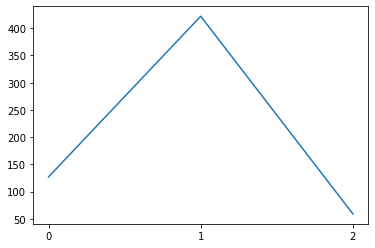

In [36]:
model_arr = np.argmax(lsamodel.get_topics(),axis=0)
y, x = np.histogram(model_arr, bins=np.arange(NUM_TOPICS+1))
fig, ax = plt.subplots()
plt.xticks(ticks=np.arange(NUM_TOPICS),labels=np.arange(NUM_TOPICS+1))
ax.plot(x[:-1], y)
fig.show()

In [37]:
len(model_arr),np.arange(NUM_TOPICS+1)

(608, array([0, 1, 2, 3]))